In [13]:
path='C:/Users/dmckenzie/Downloads/Test2.csv'
%matplotlib inline
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations 
from sklearn.cluster import KMeans
import folium
# Load data

In [14]:
p2='C:/Users/dmckenzie/Downloads/00 PRDE School Data List_Jan-25-2022 V.1 (2).xlsx'

In [15]:
data=pd.read_excel(p2,sheet_name='Consolidated',header=1)

In [16]:
data=data.drop(columns=['LEVEL','GRADES','test',
                            'GRADES MINUS LETTERS','GRADES MINUS HS/COLLEGE',
                            'SPECIAL ED','HIGH SCHOOL TEST','HIGH SCHOOL','COLLEGE',
                            'ADULT','TEST LEN','COHORT','COHORT COMBINED','FCI% ORIGINAL',
                            'ENROLLMENT 2021-22','USE OF SHELTER','DESIGNATION','PreK '])

In [17]:
import nltk

In [18]:
data=data.rename(columns={'GRADES 3/29/2022':'GRADES'})

In [19]:
data['GRADES'].value_counts().head(15).sum()/len(data)

0.9765533411488863

In [20]:
data['SpEd']=data['GRADES'].str.contains("E")*1
data['PK']=data['GRADES'].str.contains("PK")*1

In [21]:
data['GRADES2']=np.where(data['GRADES'].str.replace('|'.join(['1','2','3','4','5','6','7','8','9','0',' ','K']),'')!='',
         'Missing',
         data['GRADES'])

C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [22]:
data['GRADES'].value_counts()

K 1 2 3 4 5                            288
K 1 2 3 4 5 6 7 8                      190
9 10 11 12                             154
6 7 8                                   91
6 7 8 9 10 11 12                        36
K 1 2 3 4 5 6                           29
K 1 2 3 4 5 6 7 8 9 10 11 12            11
SHARED SCHOOL                            7
13 14                                    6
K 1 2 3 4 5 6 7 8 9                      6
7 8 9 10 11 12                           5
8 9 10 11 12                             3
ADULT BASED ON ORIGINAL CAMPUS LIST      3
NOT IN ENROLLMENT                        2
4 5 6 7 8 9 10 11 12                     2
K 1 2 3                                  2
K 1 2 3 4 5 6 7 8 9 10 11                1
6 7 8 9                                  1
6 7 8 9 10 11                            1
10 11 12                                 1
5 6 7 8 9 10 11 12                       1
6 7 8 9 10                               1
K 1 2 3 4 5 6 7 8 9 10                   1
K          

In [23]:
data['GT']=data['GRADES2'].fillna('').str.replace('EEE','').\
        str.replace('EEI','').str.replace('EES','').str.replace('PK','').str.split().apply(' '.join)

data['GT2']=np.where(data['GT']=='',' ',data['GT'])

lastelm=[]
for i in data['GT2'].str.split():
    if len(i)<2:
        lastelm.append(' ')    
    else:
        lastelm.append(i[-1])
data['Glast']=lastelm
#data['GT2']=np.where(data['GT']=='',' ',data['GT'])
firstelm=[]
for i in data['GT2'].str.split():
    if len(i)<1:
        firstelm.append(' ')
    else:
        firstelm.append(i[0])
        
data['Gfirst']=firstelm

data['Glast2']=np.where(data['Glast']==' ','1000',data['Glast'])
data['Simp']=data['Gfirst']+" "+data['Glast2']

data['Simp2']=np.where((data['Glast2'].astype(int)<=5) | (data['Simp']=='K '),'Elem',
            np.where((data['Glast2'].isin(['6','7','8','9'])) & 
                     (data['Gfirst'].isin(['K','1','2','3'])),
                     'Elem2Middle',
                    np.where((data['Simp']=='6 8') | 
                            (data['Simp']=='6 9')  |
                             (data['Simp']=='4 6') |
                             (data['Simp']=='4 8') |
                             (data['Simp']=='7 9') |
                             (data['Simp']=='6 7'),'Middle',
                            np.where((data['Glast2'].isin(['10','11','12'])) &
                                     (data['Gfirst'].isin(['5','6','7'])) ,
                                     'Middle2High',
                                    np.where((data['Glast2'].isin(['10','11','12'])) & 
                                     (data['Gfirst'].isin(['K','1','2','3','4'])),'Elem2High',
                                             np.where((data['Glast2'].isin(['10','11','12'])) &
                                                      (data['Gfirst'].isin(['8','9','10','11'])),
                                                      'High School',
                                                      np.where((data['Gfirst'].isin(['13','14','ADULTOS'])),
                                                      'Adult',np.where(data['GRADES'].str.contains('SHAR'),'Shared School','Other'))))))))

In [24]:
data['Simp2'].value_counts()

Elem             290
Elem2Middle      225
High School      158
Middle            92
Middle2High       44
Shared School     17
Elem2High         15
Adult              6
Other              6
Name: Simp2, dtype: int64

In [25]:
data['Simp2']=np.where(data['Simp2'].isin(['Elem','Elem2Middle','High School','Middle'])==False,
                       'MultiGrade/Other',data['Simp2'])

<AxesSubplot:>

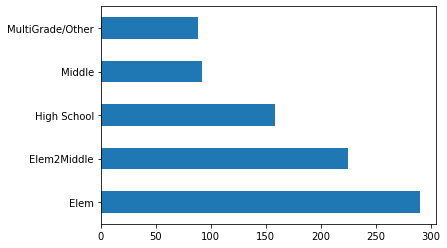

In [26]:
data['Simp2'].value_counts().plot(kind='barh')

In [31]:
data['LowHigh']=(data['Gfirst']+" "+data['Glast2'])


In [32]:
data[['CODE','Simp2','LowHigh']].to_csv('SimpGrades2.csv')